# Messing with PACE Data and Megafauna


### This notebook loads the NEFSC Mid-Atlantic cetacean survey data and explores PACE data topics and processes

First we need to import the appropriate packages and then log into NASA Earth Access with credentials


In [1]:
import earthaccess
import xarray as xr

In [2]:
auth = earthaccess.login()# are we authenticated?
if not auth.authenticated:
    # ask for credentials and persist them in a .netrc file
    auth.login(strategy="interactive", persist=True)


Next we need to find the shortname and/or concept_id for data collections. We go to https://search.earthdata.nasa.gov/search to do that. We can also search by sensor, and after select one, work out what sensor to look for data with. 

In [3]:
results = earthaccess.search_datasets(instrument="oci")
for item in results[1:150]:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_UVAI_UAA_NRT
PACE_OCI_L2_UVAI_UAA
PACE_OCI_L2_AER_UAA_NRT
PACE_OCI_L2_AER_UAA
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_AOP
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_CLOUD
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_BGC
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L3B_AOT_NRT
PACE_OCI_L3B_AOT
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_AVW
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_LANDVI_NRT
PACE_OCI_L3B_LANDVI
PACE_OCI_L3B_PIC_NRT
PACE_OCI_L3B_PIC
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_POC
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_PAR
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3B_RRS
PACE_OCI_L3B_SFREFL_NRT
PACE_OCI_L3B_SFREFL
PACE_OCI_L3M_UVAI_UAA_NRT
PACE_

## 1. Concentration of phytoplankton carbon Visualization and Data Extraction
Let's first practice with the level 3 mapped Remote satellite reflectance PACE_OCI_L3M_RRS, though we can changes this to other products. The temporal period here is one day of the survey effort for the Mid-Atlantic Marine Mammal Survey. There were quite a few observations on 2/22/2025 so trying that out first. We can also add in the bounding box for the region.

In [4]:

results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_CARBON',
    temporal = ("2025-02-22", "2025-02-22"),
    bounding_box = (-71.5, 35.5, -77.0, 41.0)
)
len(results)

16


If there are a lot of results, filtering by granual helps. First look at the list of results to see what granuals there are. 

In [5]:
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241221_20250320.L3m.SNWI.CARBON.V3_1.carbon_phyto.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20241221_20250320.L3m.SNWI.CARBON.V3_1.carbon_phyto.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250125_20250225.L3m.R32.CARBON.V3_1.carbon_phyto.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250125_20250225.L3m.R32.CARBON.V3_1.carbon_phyto.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250201_20250228.L3m.MO.CARBON.V3_1.carbon_phyto.0p1deg.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250201_20250228.L3m.MO.CARBON.V3_1.carbon_phyto.4km.nc'],
 ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250202_20250305.L3m.R32.CARBON.V3_1.carbon_phyto.0p1deg.nc'],
 ['https://obda

Then we can specify the granual that we would like with the data query.

In [6]:
# bounding_box = (lat_min, lon_min, lat_max, lon_max)
results = earthaccess.search_data(
    short_name = 'PACE_OCI_L3M_CARBON',
    temporal = ("2025-02-22", "2025-02-22"),
    granule_name="*.8D.*.4km.*",
    bounding_box = (-71.5, 35.5, -77.0, 41.0)
)
len(results)

1

We look at the file names

In [7]:
[res.data_links() for res in results]

[['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20250218_20250225.L3m.8D.CARBON.V3_1.carbon_phyto.4km.nc']]


Next x-array opens the data, and then we read one file in

In [8]:
fileset = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
ds1 = xr.open_dataset(fileset[0])
ds1

<xarray.Dataset> Size: 149MB
Dimensions:       (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat           (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon           (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    carbon_phyto  (lat, lon) float32 149MB ...
    palette       (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/62)
    product_name:                      PACE_OCI.20250218_20250225.L3m.8D.CARB...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CARBON/3.1
    data_bins:                         14674623
    data_minimum:                      0.6052964
    data_maximum:                      999.77716

For working with Concentration of Phytoplankton Carbon - short name carbon_phyto

In [12]:
ds1['carbon_phyto']

<xarray.DataArray 'carbon_phyto' (lat: 4320, lon: 8640)> Size: 149MB
[37324800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 17kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Phytoplankton Carbon
    units:          mg m^-3
    valid_min:      0.0
    valid_max:      1000.0
    reference:      Graff, J.R., Westberry, T.K., Milligan, A.J., Brown, M.B....
    display_scale:  linear
    display_min:    0.0
    display_max:    120.0

Lazy loading the data just to practice

In [13]:
ds_size_gb = ds1.nbytes / 1e9
print(f"Dataset size: {ds_size_gb:.2f} GB")

Dataset size: 0.15 GB


In [14]:
downloaded_files = earthaccess.download(
    results[0:9],
    local_path='data',
)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]








If we are running RRS, then we can look at wavelength, but not for CHL. This will let us see what wavelenths are available

In [15]:
# ds1['carbon_phyto']

Plotting the phytoplankton carbon data for our box on a log scale

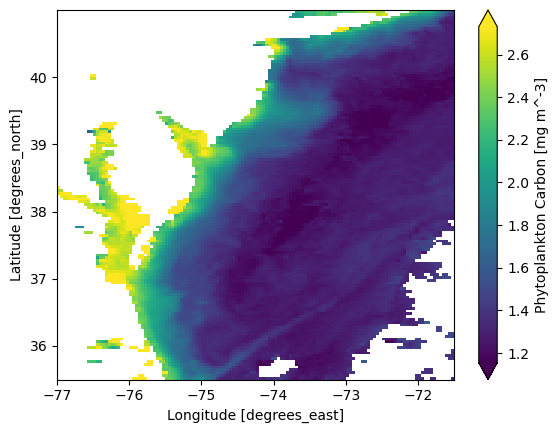

In [16]:
import numpy as np

car = ds1['carbon_phyto']

car_sub = car.sel(
    lat=slice(41.0, 35.5),
    lon=slice(-77.0, -71.5)
)

log_car_sub = np.log10(car_sub.where(car_sub > 0))

log_car_sub.plot(robust=True)

We need to pull in the observation data and overlay on the map as well. 

In [17]:
# Import pandas
import pandas as pd

# Read the CSV file
# The file path in your Jupyter notebook environment is:
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

# Take a quick look at the data
print(f"Total observations: {len(obs)}")
print("\nFirst few rows:")
obs.head()

Total observations: 121

First few rows:


,dataset_id,row_id,latitude,longitude,species_name,scientific_name,common_name,itis_tsn,group_size,series_id,...,edit1,edit2,edit3,misc_edit1,misc_edit2,misc_edit3,misc_edit4,rid,event_t,datetime_et
0,2368,2368_10,37.14515,-74.54101,FIWH,Balaenoptera physalus,Fin whale,180527,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5037879,NaN,28-DEC-24 11.33.07.000000000 AM
1,2368,2368_106,38.31930,-73.84825,FIWH,Balaenoptera physalus,Fin whale,180527,1,NaN,...,sigcom from unlw,NaN,NaN,NaN,NaN,NaN,NaN,5074256,NaN,22-FEB-25 02.46.46.000000000 PM
2,2368,2368_107,38.31815,-73.85002,FIWH,Balaenoptera physalus,Fin whale,180527,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074280,NaN,22-FEB-25 02.50.02.000000000 PM
3,2368,2368_108,38.30965,-73.82714,HUWH,Megaptera novaeangliae,Humpback whale,180530,2,NaN,...,sigcom from unlw,NaN,NaN,NaN,NaN,NaN,NaN,5074289,NaN,22-FEB-25 02.50.41.000000000 PM
4,2368,2368_109,38.80395,-72.99513,HUWH,Megaptera novaeangliae,Humpback whale,180530,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5082566,NaN,26-FEB-25 11.45.26.000000000 AM



Overlaying the observations of marine mammals just to test...

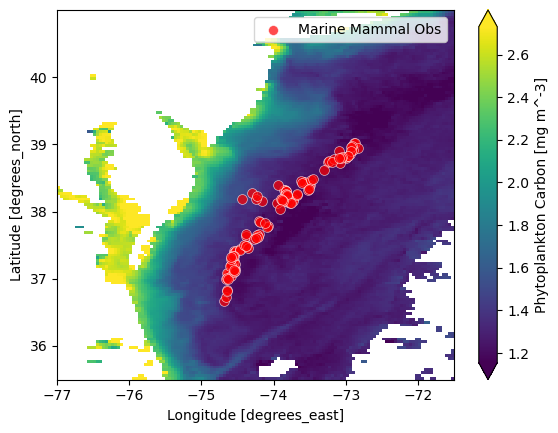

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

car = ds1['carbon_phyto']
car_sub = car.sel(
    lat=slice(41.0, 35.5),
    lon=slice(-77.0, -71.5)
)


log_car_sub = np.log10(car_sub.where(car_sub > 0))

log_car_sub.plot(robust=True)



# Get the current axes and add scatter points
ax = plt.gca()  # "get current axes"
ax.scatter(obs['longitude'], 
          obs['latitude'],
          c='red',
          s=50,
          alpha=0.7,
          edgecolors='white',
          linewidths=0.5,
          label='Marine Mammal Obs')

ax.legend()
plt.show()

AttributeError: 'str' object has no attribute 'vmin'

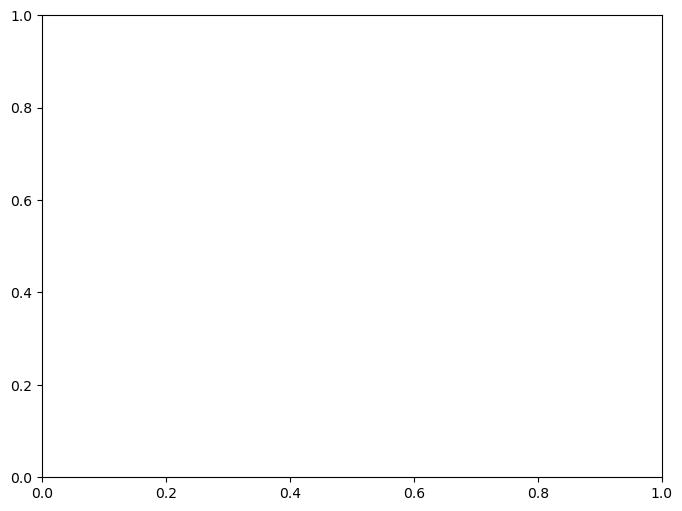

In [58]:
#trying to add bathymetry

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# --- Phytoplankton carbon ---
car = ds1['carbon_phyto']

car_sub = car.sel(
    lat=slice(41.0, 35.5),
    lon=slice(-77.0, -71.5)
)

# --- Load cropped GEBCO ---
gebco = xr.open_dataset("/home/jovyan/2026_proj_megafauna/data/gebco_2025.nc")

gebco_bathy = gebco['elevation']

# Optional: ensure ocean only
gebco_bathy = gebco_bathy.where(gebco_bathy < 0)

# --- Align GEBCO to carbon grid extent ---
gebco_sub = gebco_bathy.sel(
    lat=slice(car_sub.lat.max(), car_sub.lat.min()),
    lon=slice(car_sub.lon.min(), car_sub.lon.max())
)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# Carbon (log scale)
car_sub.plot(
    ax=ax,
    norm='log',
    cmap='viridis',
    robust=True,
    add_colorbar=True
)

# Bathymetry contours
cs = gebco_sub.plot.contour(
    ax=ax,
    levels=[-20, -50, -100, -200, -500],
    colors='black',
    linewidths=0.7
)

ax.clabel(cs, fmt='%d m', fontsize=8)

ax.set_title("Phytoplankton Carbon with GEBCO Bathymetry")

plt.show()



# Get the current axes and add scatter points
ax = plt.gca()  # "get current axes"
ax.scatter(obs['longitude'], 
          obs['latitude'],
          c='red',
          s=50,
          alpha=0.7,
          edgecolors='white',
          linewidths=0.5,
          label='Marine Mammal Obs')

ax.legend()
plt.show()

## 2. Extracting carbon For marine mammal observations and plotting

The plot above is for a single day, and that's not really anything we can work with for the full dataset which extends from Dec 28 to March 28. So we will need to look through to extract the appropriate data.We are leveraging the 3x3 section of code (though it is modified here to fit our use case) from the "matchups.ipynb." 1. What is the 3x3 box? A 3x3 pixel box means extracting 9 pixels (3×3 grid) centered on your observation point. This helps:

Reduce noise from individual bad pixels (clouds, glint, etc.)
Account for spatial uncertainty in the whale's exact position
Better represent the environment the whale is actually experiencing (they move through a patch, not a single point) 


In [19]:
import earthaccess
import xarray as xr
import pandas as pd
import numpy as np
from tqdm import tqdm

# Read your observations
obs = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/OBIS_NEFSC_offshore_obs.csv')

# Convert date_time to datetime
obs['date'] = pd.to_datetime(obs['date_time']).dt.date
obs['date'] = pd.to_datetime(obs['date'])

# Get unique dates
unique_dates = obs['date'].unique()
print(f"Found {len(unique_dates)} unique observation dates")
print(f"Date range: {obs['date'].min()} to {obs['date'].max()}")

# Login to earthaccess
auth = earthaccess.login()

# Define your bounding box (lon_min, lat_min, lon_max, lat_max)
bounding_box = (-77.0, 35.5, -71.5, 41.0)

results_list = []

# Loop through unique dates
for date in tqdm(unique_dates, desc="Processing unique dates"):
    
    # For 8-day composites, search +/- 7 days
    start = (date - pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    end = (date + pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    
    try:
        results = earthaccess.search_data(
            short_name='PACE_OCI_L3M_CARBON',
            temporal=(start, end),
            granule_name="*.8D.*.4km.*",
            bounding_box=bounding_box
        )
        
        if not results:
            print(f"No data found for {date}")
            continue
            
        fileset = earthaccess.open(results)
        
        for ea_file in fileset:
            with xr.open_dataset(ea_file, engine="h5netcdf") as ds:
                points_today = obs[obs['date'] == date]
                
                lat_vals = ds.lat.values
                lon_vals = ds.lon.values
                
                for idx, row in tqdm(points_today.iterrows(), 
                                    total=len(points_today), 
                                    desc=f"Points on {date.date()}", 
                                    leave=False):
                    
                    lat_center = row['latitude']
                    lon_center = row['longitude']
                    
                    # Find nearest indices for 3x3 box
                    lat_idx = np.abs(lat_vals - lat_center).argmin()
                    lon_idx = np.abs(lon_vals - lon_center).argmin()
                    
                    lat_slice = slice(max(lat_idx-1, 0), min(lat_idx+2, len(lat_vals)))
                    lon_slice = slice(max(lon_idx-1, 0), min(lon_idx+2, len(lon_vals)))
                    
                    # Extract chlorophyll from 3x3 box
                    chl_box = ds["carbon_phyto"].isel(lat=lat_slice, lon=lon_slice)
                    
                    # Calculate statistics
                    result_row = {
                        'Original_Index': idx,
                        'latitude': lat_center,
                        'longitude': lon_center,
                        'date_time': row['date_time'],
                        'date': date,
                        'common_name': row['common_name'],
                        'scientific_name': row['scientific_name'],
                        'group_size': row['group_size'],
                        'carbon_phyto_mean': float(chl_box.mean(skipna=True).values),
                        'carbon_phyto_median': float(chl_box.median(skipna=True).values),
                        'carbon_phyto_std': float(chl_box.std(skipna=True).values),
                        'carbon_phyto_min': float(chl_box.min(skipna=True).values),
                        'carbon_phyto_max': float(chl_box.max(skipna=True).values),
                        'carbon_phyto_q25': float(chl_box.quantile(0.25, skipna=True).values),
                        'carbon_phyto_q75': float(chl_box.quantile(0.75, skipna=True).values)
                    }
                    results_list.append(result_row)
                    
    except Exception as e:
        print(f"Error processing {date}: {e}")
        continue

# Save results
if results_list:
    final_df = pd.DataFrame(results_list)
    output_file = "/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_carbon.csv"
    final_df.to_csv(output_file, index=False)
    print(f"\nCSV saved: {output_file}")
    print(f"Total matched observations: {len(final_df)}")
    
    # Display summary statistics
    print("\n=== Summary by Species ===")
    print(final_df.groupby('common_name')['carbon_phyto_median'].describe())
else:
    print("No data extracted.")

Found 19 unique observation dates
Date range: 2024-12-28 00:00:00 to 2025-03-28 00:00:00


Processing unique dates:   0%|          | 0/19 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2024-12-28:  50%|█████     | 1/2 [00:00<00:00,  5.85it/s]
                                                                   
Points on 2024-12-28:  50%|█████     | 1/2 [00:00<00:00,  2.76it/s]
                                                                   
Processing unique dates:   5%|▌         | 1/19 [00:10<03:08, 10.46s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-22:  94%|█████████▍| 15/16 [00:00<00:00, 49.03it/s]
                                                                     
Points on 2025-02-22:  50%|█████     | 8/16 [00:00<00:00, 29.85it/s]
                                                                    
Processing unique dates:  11%|█         | 2/19 [00:18<02:29,  8.77s/it]A

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-02-26:  14%|█▍        | 1/7 [00:00<00:00,  6.21it/s]
                                                                   
Processing unique dates:  16%|█▌        | 3/19 [00:24<02:04,  7.76s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-23: 100%|██████████| 9/9 [00:00<00:00, 31.28it/s]
                                                                   
Points on 2025-02-23: 100%|██████████| 9/9 [00:00<00:00, 36.56it/s]
                                                                   
Processing unique dates:  21%|██        | 4/19 [00:31<01:50,  7.37s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-24:  12%|█▎        | 1/8 [00:00<00:00,  7.72it/s]
                                                                   
Points on 2025-02-24: 100%|██████████| 8/8 [00:00<00:00, 33.22it/s]
                                                                   
Processing unique dates:  26%|██▋       | 5/19 [00:38<01:42,  7.29s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-02-18:  50%|█████     | 1/2 [00:00<00:00,  9.31it/s]
                                                                   
Processing unique dates:  32%|███▏      | 6/19 [00:44<01:28,  6.83s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-02-25:  11%|█         | 1/9 [00:00<00:01,  5.04it/s]
                                                                   
Processing unique dates:  37%|███▋      | 7/19 [00:50<01:19,  6.59s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-03: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]
                                                                   
Points on 2025-03-03: 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]
                                                                   
Processing unique dates:  42%|████▏     | 8/19 [00:57<01:12,  6.62s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-01-24:  20%|██        | 1/5 [00:00<00:01,  3.58it/s]/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(

                                                                   
Processing unique dates:  47%|████▋     | 9/19 [01:03<01:05,  6.60s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-01-27:  17%|█▋        | 1/6 [00:00<00:00,  7.19it/s]
                                                                   
Points on 2025-01-27:  17%|█▋        | 1/6 [00:00<00:00,  6.68it/s]
                                                                   
Processing unique dates:  53%|█████▎    | 10/19 [01:10<00:59,  6.62s/it]

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]


Points on 2025-01-25:  12%|█▎        | 1/8 [00:00<00:00,  8.61it/s]
                                                                   
Processing unique dates:  58%|█████▊    | 11/19 [01:16<00:51,  6.39s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-19:  33%|███▎      | 1/3 [00:00<00:00,  7.04it/s]
                                                                   
Points on 2025-03-19:  33%|███▎      | 1/3 [00:00<00:00,  7.03it/s]
                                                                   
Processing unique dates:  63%|██████▎   | 12/19 [01:22<00:44,  6.34s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-25:  89%|████████▉ | 8/9 [00:00<00:00, 40.68it/s]
                                                                   
Points on 2025-03-25: 100%|██████████| 9/9 [00:00<00:00, 46.00it/s]
                                                                   
Processing unique dates:  68%|██████▊   | 13/19 [01:29<00:38,  6.49s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-28:  17%|█▋        | 1/6 [00:00<00:00,  8.87it/s]
                                                                   
Points on 2025-03-28:  50%|█████     | 3/6 [00:00<00:00, 28.30it/s]
                                                                   
Processing unique dates:  74%|███████▎  | 14/19 [01:35<00:31,  6.33s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-23:  75%|███████▌  | 9/12 [00:00<00:00, 35.28it/s]
                                                                    
Points on 2025-03-23:  75%|███████▌  | 9/12 [00:00<00:00, 47.41it/s]
                                                                    
Processing unique dates:  79%|███████▉  | 15/19 [01:41<00:25,  6.32s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-04:  50%|█████     | 1/2 [00:00<00:00,  5.03it/s]
                                                                   
Points on 2025-03-04:  50%|█████     | 1/2 [00:00<00:00,  5.89it/s]
                                                                   
Processing unique dates:  84%|████████▍ | 16/19 [01:47<00:18,  6.28s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-11: 100%|██████████| 9/9 [00:00<00:00, 37.80it/s]
                                                                   
Points on 2025-03-11: 100%|██████████| 9/9 [00:00<00:00, 42.26it/s]
                                                                   
Processing unique dates:  89%|████████▉ | 17/19 [01:54<00:12,  6.26s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-03-09:  33%|███▎      | 1/3 [00:00<00:00,  5.35it/s]
                                                                   
Points on 2025-03-09:  33%|███▎      | 1/3 [00:00<00:00,  9.08it/s]
                                                                   
Processing unique dates:  95%|█████████▍| 18/19 [02:00<00:06,  6.19s/it]

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]


Points on 2025-02-15:  25%|██▌       | 1/4 [00:00<00:01,  2.80it/s]
                                                                   
Points on 2025-02-15:  25%|██▌       | 1/4 [00:00<00:00,  8.39it/s]
                                                                   
Processing unique dates: 100%|██████████| 19/19 [02:06<00:00,  6.65s/it]


CSV saved: /home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_carbon.csv
Total matched observations: 332

=== Summary by Species ===
                            count       mean        std        min        25%  \
common_name                                                                     
Beaked whales                 6.0  17.603437   1.618708  15.896342  16.275538   
Blue whale                    4.0  22.462296   5.990675  17.274220  17.274220   
Common minke whale           21.0  32.967156  16.656084  16.473537  18.549862   
Fin whale                   151.0  24.969207  10.523865  14.258782  17.716226   
Humpback whale              125.0  24.688729  10.851413   7.727892  17.859308   
North Atlantic right whale    3.0  19.486891   0.702219  18.727394  19.174047   
Sperm whale                  21.0  21.081580   5.190667  15.858827  17.897905   

                                  50%        75%        max  
common_name                                                  
B





Next we get to plot the time series data yay!
We are also going to put together another few figures for dataset - as well as summary stats table. 


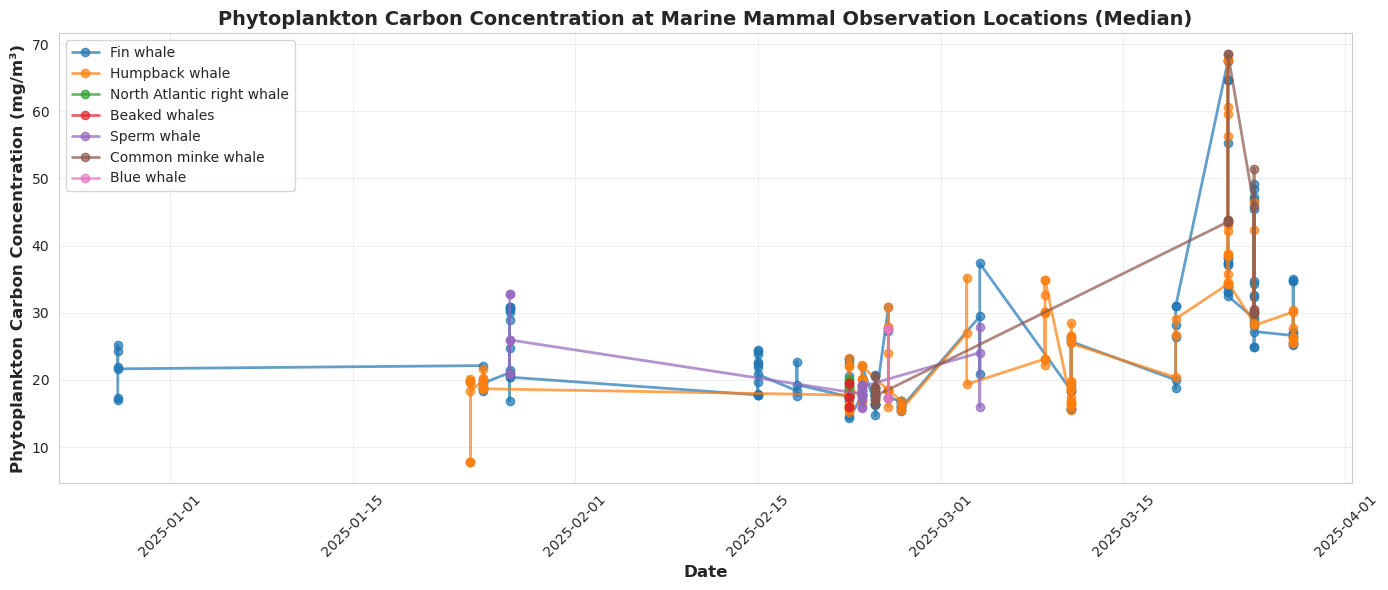

/tmp/ipykernel_4112/4071404686.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([final_df[final_df['common_name'] == species]['carbon_phyto_median'].dropna()


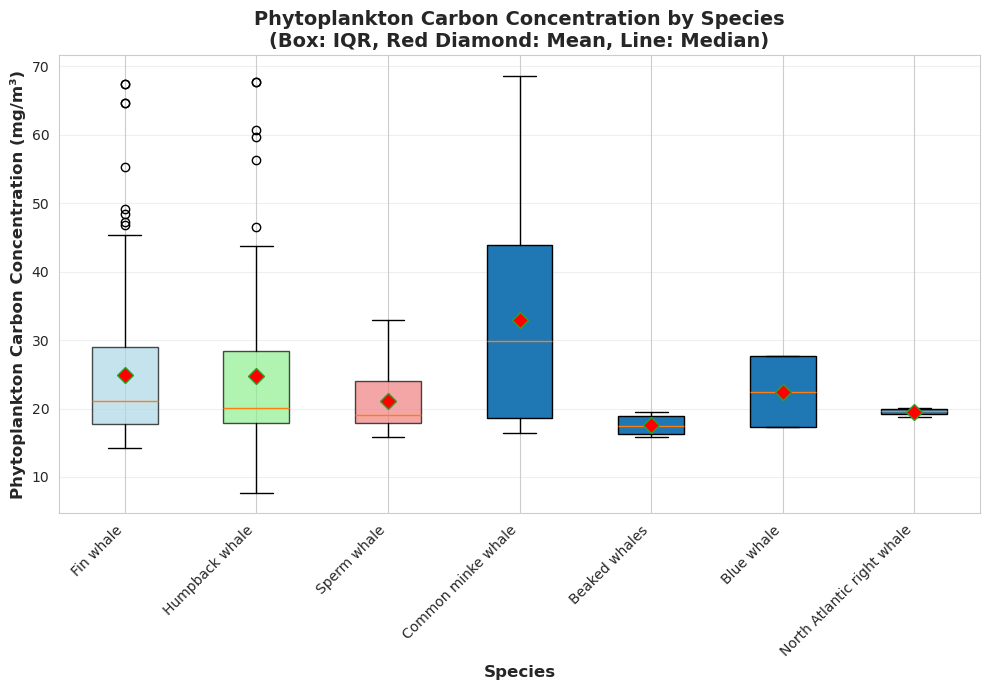

/tmp/ipykernel_4112/4071404686.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_df,


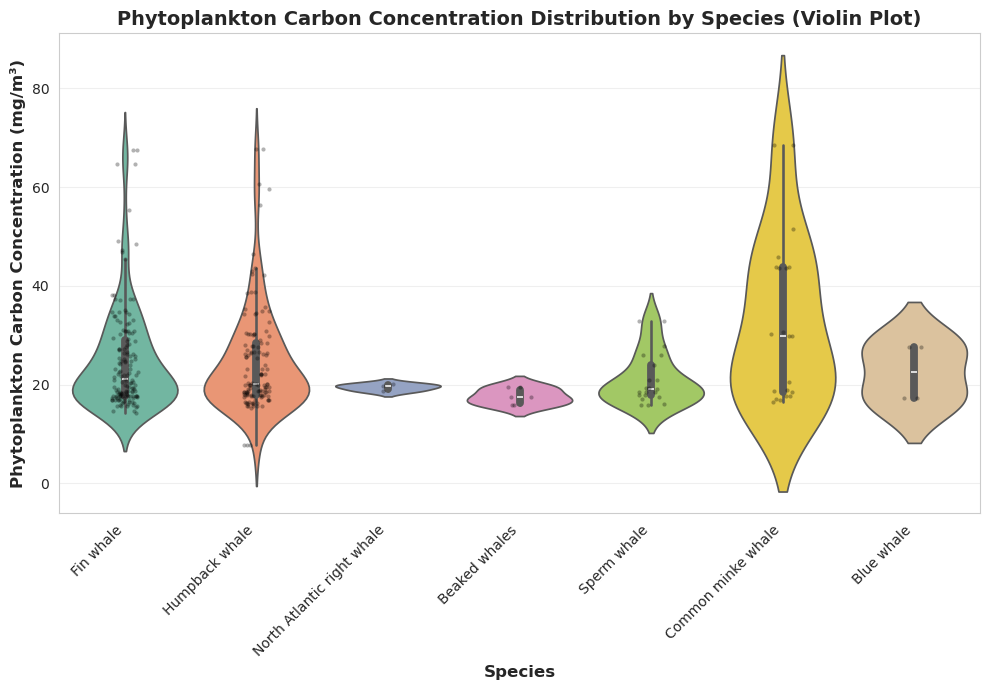


=== Phytoplankton Carbon Statistics by Species ===
                            Count    Mean  Median  Std Dev     Min     Max  \
common_name                                                                  
Beaked whales                   6  17.603  17.413    1.619  15.896  19.501   
Blue whale                      4  22.462  22.462    5.991  17.274  27.650   
Common minke whale             21  32.967  29.906   16.656  16.474  68.579   
Fin whale                     151  24.969  21.074   10.524  14.259  67.450   
Humpback whale                125  24.689  20.065   10.851   7.728  67.679   
North Atlantic right whale      3  19.487  19.621    0.702  18.727  20.113   
Sperm whale                    21  21.082  19.017    5.191  15.859  32.870   

                               25%     75%  
common_name                                 
Beaked whales               16.276  18.979  
Blue whale                  17.274  27.650  
Common minke whale          18.550  43.844  
Fin whale           

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Make sure we have the data
if results_list:
    final_df['date'] = pd.to_datetime(final_df['date'])
    
    # Set up the plotting style
    sns.set_style("whitegrid")

# Make sure we have the data
if results_list:
    final_df['date'] = pd.to_datetime(final_df['date'])
    
    # Set up the plotting style
    sns.set_style("whitegrid")
    
    # ===== PLOT 1: Time Series by Species =====
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot each species with median values
    for species in final_df['common_name'].unique():
        species_data = final_df[final_df['common_name'] == species].copy()
        species_data = species_data.sort_values('date')
        
        ax.plot(species_data['date'], 
                species_data['carbon_phyto_median'], 
                'o-', 
                label=species, 
                alpha=0.7,
                markersize=6,
                linewidth=2)
    
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('Phytoplankton Carbon Concentration (mg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Phytoplankton Carbon Concentration at Marine Mammal Observation Locations (Median)', 
                 fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/PhytoplanktonCarbon_timeseries.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 2: Box and Whisker Plot by Species =====
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Create box plot using median values
    species_order = final_df['common_name'].value_counts().index.tolist()
    
    bp = ax.boxplot([final_df[final_df['common_name'] == species]['carbon_phyto_median'].dropna() 
                      for species in species_order],
                     labels=species_order,
                     patch_artist=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=8))
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel('Phytoplankton Carbon Concentration (mg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Phytoplankton Carbon Concentration by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
                 fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/Carbon_boxplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 3: Alternative Violin Plot (shows distribution better) =====
    fig, ax = plt.subplots(figsize=(10, 7))
    
    sns.violinplot(data=final_df, 
                   x='common_name', 
                   y='carbon_phyto_median',
                   palette='Set2',
                   ax=ax)
    
    # Add individual points
    sns.stripplot(data=final_df, 
                  x='common_name', 
                  y='carbon_phyto_median',
                  color='black',
                  alpha=0.3,
                  size=3,
                  ax=ax)
    
    ax.set_xlabel('Species', fontsize=12, fontweight='bold')
    ax.set_ylabel('Phytoplankton Carbon Concentration (mg/m³)', fontsize=12, fontweight='bold')
    ax.set_title('Phytoplankton Carbon Concentration Distribution by Species (Violin Plot)', 
                 fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/Carbon_violinplot.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ===== PLOT 4: Summary Statistics Table =====
    print("\n=== Phytoplankton Carbon Statistics by Species ===")
    summary = final_df.groupby('common_name')['carbon_phyto_median'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std Dev', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('25%', lambda x: x.quantile(0.25)),
        ('75%', lambda x: x.quantile(0.75))
    ]).round(3)
    print(summary)
    
    # Save summary to CSV
    summary.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/carbon_summary_stats.csv')
    
else:
    print("No data to plot.")

Lets do a correlation between the values of chlorophyll and the group size of each observation. And also box plot for the group size values to see if anything there. 

Total observations for analysis: 331
Species found: ['Fin whale' 'Humpback whale' 'North Atlantic right whale' 'Beaked whales'
 'Sperm whale' 'Common minke whale' 'Blue whale']

CORRELATION ANALYSIS: Group Size vs Phytoplankton Carbon

Fin whale (n=151)
--------------------------------------------------
  Pearson correlation:  r = 0.112, p-value = 0.1713
  Spearman correlation: ρ = 0.154, p-value = 0.0597
  → No significant correlation (p ≥ 0.05)

Humpback whale (n=125)
--------------------------------------------------
  Pearson correlation:  r = 0.179, p-value = 0.0462
  Spearman correlation: ρ = 0.068, p-value = 0.4496
  → No significant correlation (p ≥ 0.05)

North Atlantic right whale (n=3)
--------------------------------------------------
  Pearson correlation:  r = nan, p-value = nan
  Spearman correlation: ρ = nan, p-value = nan
  → No significant correlation (p ≥ 0.05)

Beaked whales (n=6)
--------------------------------------------------
  Pearson correlation:  r = nan, p-

/tmp/ipykernel_4112/406587418.py:33: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_r, pearson_p = stats.pearsonr(species_data['group_size'],
/tmp/ipykernel_4112/406587418.py:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_r, spearman_p = stats.spearmanr(species_data['group_size'],
/tmp/ipykernel_4112/406587418.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([analysis_df[analysis_df['common_name'] == species]['carbon_phyto_median'].dropna()


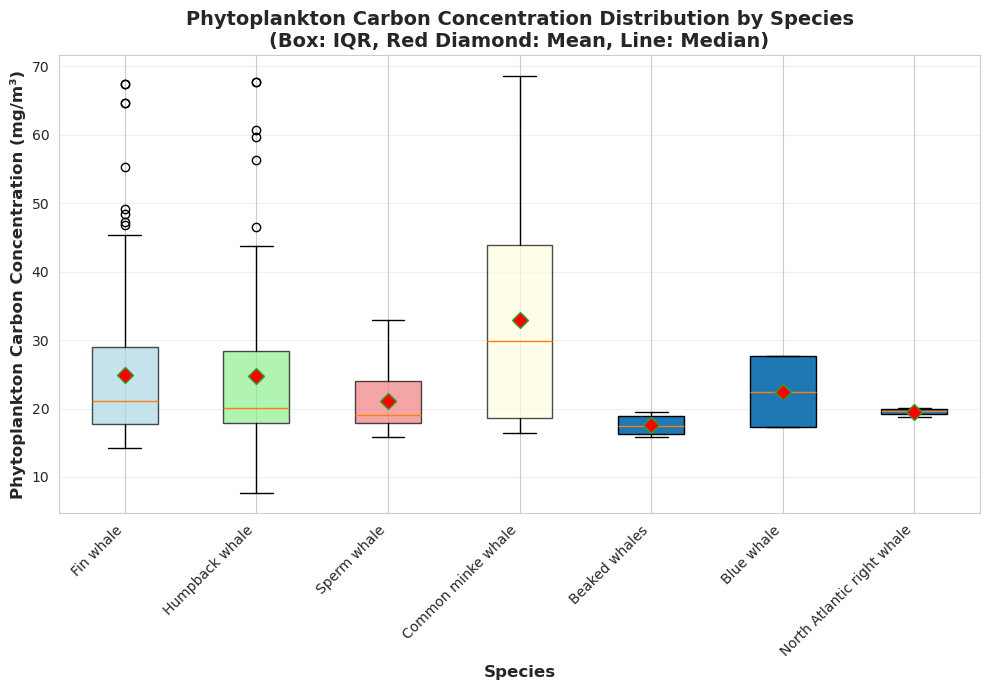

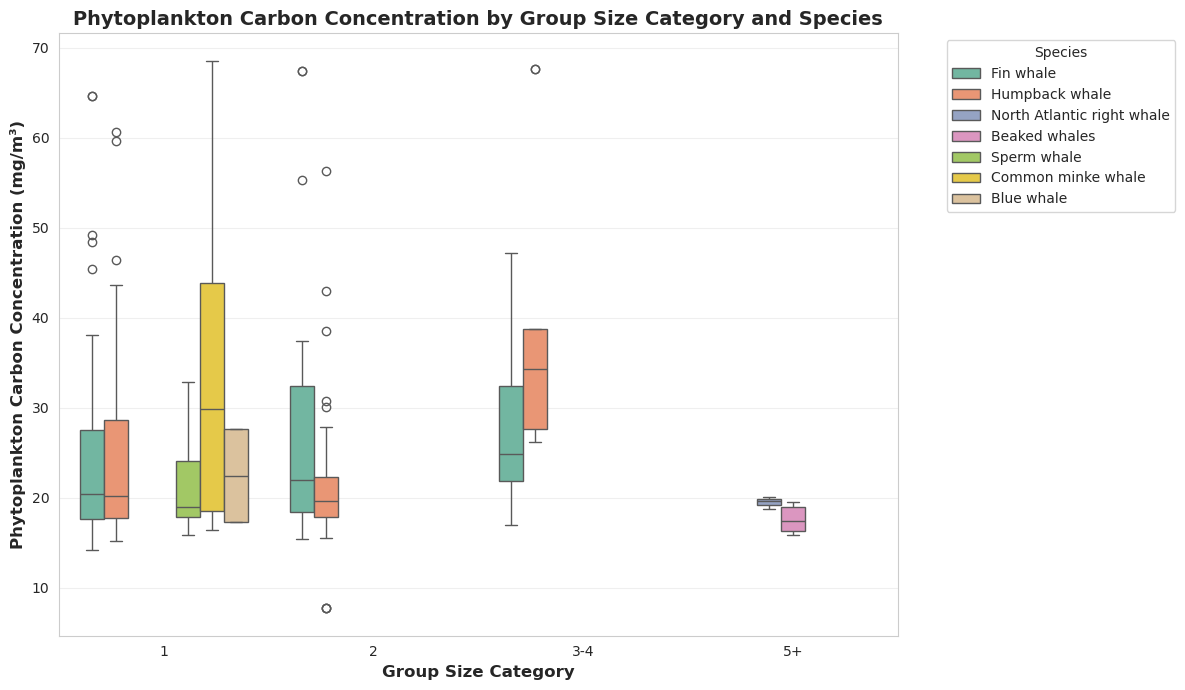


All plots saved successfully!


In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load your data
final_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_carbon.csv')

# Remove any NaN values in group_size or chlorophyll
analysis_df = final_df[['common_name', 'group_size', 'carbon_phyto_median']].dropna()

# Remove any observations with group_size = 0 if they exist
analysis_df = analysis_df[analysis_df['group_size'] > 0]

print(f"Total observations for analysis: {len(analysis_df)}")
print(f"Species found: {analysis_df['common_name'].unique()}")

# ===== STATISTICAL ANALYSIS: CORRELATION BY SPECIES =====
print("\n" + "="*70)
print("CORRELATION ANALYSIS: Group Size vs Phytoplankton Carbon")
print("="*70)

correlation_results = []

species_list = analysis_df['common_name'].unique()

for species in species_list:
    species_data = analysis_df[analysis_df['common_name'] == species]
    
    if len(species_data) > 2:
        # Pearson correlation (linear relationship)
        pearson_r, pearson_p = stats.pearsonr(species_data['group_size'], 
                                               species_data['carbon_phyto_median'])
        
        # Spearman correlation (monotonic relationship, more robust for discrete data)
        spearman_r, spearman_p = stats.spearmanr(species_data['group_size'], 
                                                  species_data['carbon_phyto_median'])
        
        print(f"\n{species} (n={len(species_data)})")
        print("-" * 50)
        print(f"  Pearson correlation:  r = {pearson_r:.3f}, p-value = {pearson_p:.4f}")
        print(f"  Spearman correlation: ρ = {spearman_r:.3f}, p-value = {spearman_p:.4f}")
        
        # Interpretation
        if spearman_p < 0.05:  # Use Spearman for discrete data
            direction = "positive" if spearman_r > 0 else "negative"
            print(f"  → Significant {direction} correlation (p < 0.05)")
        else:
            print(f"  → No significant correlation (p ≥ 0.05)")
        
        correlation_results.append({
            'Species': species,
            'N': len(species_data),
            'Pearson_r': pearson_r,
            'Pearson_p': pearson_p,
            'Spearman_rho': spearman_r,
            'Spearman_p': spearman_p
        })

# Save correlation results
if correlation_results:
    corr_df = pd.DataFrame(correlation_results)
    corr_df.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/groupsize_carbon_correlations.csv', 
                   index=False)
    print("\n" + "="*70)
    print("Correlation results saved to groupsize_carbon_correlations.csv")
    print("="*70)

# ===== PLOT 1: Box Plot by Species =====
fig, ax = plt.subplots(figsize=(10, 7))

# Create box plot by species
species_order = analysis_df['common_name'].value_counts().index.tolist()

bp = ax.boxplot([analysis_df[analysis_df['common_name'] == species]['carbon_phyto_median'].dropna() 
                  for species in species_order],
                 labels=species_order,
                 patch_artist=True,
                 showmeans=True,
                 meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(bp['boxes'], colors[:len(bp['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Species', fontsize=12, fontweight='bold')
ax.set_ylabel('Phytoplankton Carbon Concentration (mg/m³)', fontsize=12, fontweight='bold')
ax.set_title('Phytoplankton Carbon Concentration Distribution by Species\n(Box: IQR, Red Diamond: Mean, Line: Median)', 
             fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/chlorophyll_by_species_boxplot.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# ===== PLOT 2: Box Plot by Group Size Category and Species =====
# Bin group sizes into categories
analysis_df['group_size_category'] = pd.cut(analysis_df['group_size'], 
                                             bins=[0, 1, 2, 4, 100],
                                             labels=['1', '2', '3-4', '5+'])

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=analysis_df, 
            x='group_size_category', 
            y='carbon_phyto_median',
            hue='common_name',
            palette='Set2',
            ax=ax)

ax.set_xlabel('Group Size Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Phytoplankton Carbon Concentration (mg/m³)', fontsize=12, fontweight='bold')
ax.set_title('Phytoplankton Carbon Concentration by Group Size Category and Species', fontsize=14, fontweight='bold')
ax.legend(title='Species', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/groupsize_categories_carbon.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nAll plots saved successfully!")

## 3.Environmental Niche Comparison
The Environmental Niche Comparison quantifies whether different marine mammal species occupy distinct ecological niches by comparing the environmental conditions (chlorophyll concentration, chlorophyll variability, and geographic location) at observation sites. The analysis produces distribution histograms showing the frequency of observations across environmental gradients for each species, statistical tests (Kruskal-Wallis) to determine if species differ significantly in their habitat use, and niche overlap metrics (Pianka's index, 0-1 scale) that quantify how much species' environmental preferences overlap. High niche overlap (>0.7) suggests species are ecological generalists using similar habitats and may compete for resources, while low overlap (<0.4) indicates niche partitioning where species specialize in different conditions, reducing competition. The environmental space plots reveal whether species cluster in different regions of chlorophyll-latitude space, indicating habitat specialization, or if they overlap broadly, suggesting opportunistic habitat use. This analysis directly addresses whether marine mammal species in your study area are responding to environmental gradients in species-specific ways (requiring separate conservation strategies) or if they function as a generalized "marine mammal community" with similar habitat requirements (allowing for unified management approaches). The results provide the ecological justification for whether subsequent analyses should be species-specific or can be conducted on pooled data.

ENVIRONMENTAL NICHE ANALYSIS

Phytoplankton Carbon Concentration Conditions by Species:
                           carbon_phyto_median                          \
                                         count    mean     std     min   
common_name                                                              
Beaked whales                                6  17.603   1.619  15.896   
Blue whale                                   4  22.462   5.991  17.274   
Common minke whale                          21  32.967  16.656  16.474   
Fin whale                                  151  24.969  10.524  14.259   
Humpback whale                             125  24.689  10.851   7.728   
North Atlantic right whale                   3  19.487   0.702  18.727   
Sperm whale                                 21  21.082   5.191  15.859   

                                   carbon_phyto_std        latitude         \
                               max             mean    std     mean    std   
common_name    

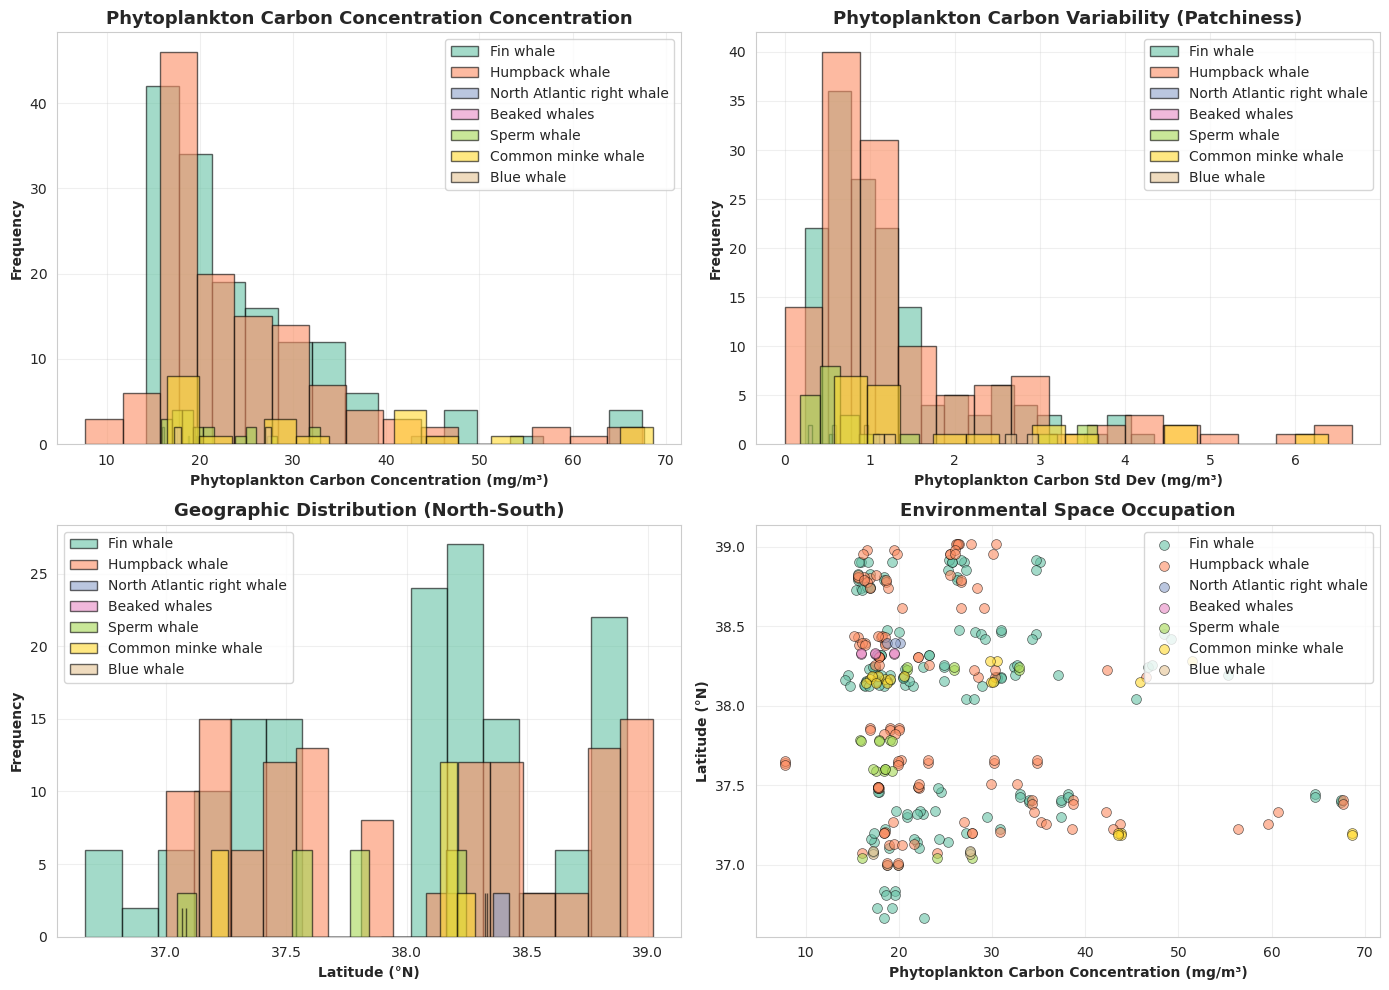


STATISTICAL COMPARISON: Do species use different habitats?

Chlorophyll concentration:
  H-statistic: 11.671
  p-value: 0.0697
  → No significant difference between species (p ≥ 0.05)

Latitude (geographic distribution):
  H-statistic: 19.990
  p-value: 0.0028
  → Species differ significantly in latitude (p < 0.05)

NICHE OVERLAP ANALYSIS

Phytoplankton Carbon Concentration Niche Overlap (0 = no overlap, 1 = complete overlap):
  Fin whale vs Humpback whale: 28.340
  Fin whale vs North Atlantic right whale: 2.003
  Fin whale vs Beaked whales: 5.373
  Fin whale vs Sperm whale: 17.648
  Fin whale vs Common minke whale: 26.760
  Fin whale vs Blue whale: 21.746
  Humpback whale vs North Atlantic right whale: 1.925
  Humpback whale vs Beaked whales: 5.483
  Humpback whale vs Sperm whale: 18.657
  Humpback whale vs Common minke whale: 29.324
  Humpback whale vs Blue whale: 23.689
  North Atlantic right whale vs Beaked whales: 1.847
  North Atlantic right whale vs Sperm whale: 2.350
  North A

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load your data
df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_carbon.csv')

# Clean data
df_clean = df[['common_name', 'latitude', 'longitude', 
               'carbon_phyto_median', 'carbon_phyto_std']].dropna()

print("="*70)
print("ENVIRONMENTAL NICHE ANALYSIS")
print("="*70)

# Summary statistics by species
print("\nPhytoplankton Carbon Concentration Conditions by Species:")
summary = df_clean.groupby('common_name').agg({
    'carbon_phyto_median': ['count', 'mean', 'std', 'min', 'max'],
    'carbon_phyto_std': ['mean', 'std'],
    'latitude': ['mean', 'std'],
    'longitude': ['mean', 'std']
}).round(3)

print(summary)

# ===== VISUALIZATION 1: Multi-panel Environmental Comparison =====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

species_list = df_clean['common_name'].unique()
colors = sns.color_palette("Set2", len(species_list))

# Panel 1: Chlorophyll Distribution
ax1 = axes[0, 0]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['carbon_phyto_median']
    ax1.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax1.set_xlabel('Phytoplankton Carbon Concentration (mg/m³)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Phytoplankton Carbon Concentration Concentration', fontweight='bold', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel 2: Chlorophyll Variability
ax2 = axes[0, 1]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['carbon_phyto_std']
    ax2.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax2.set_xlabel('Phytoplankton Carbon Std Dev (mg/m³)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Phytoplankton Carbon Variability (Patchiness)', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: Latitude Distribution
ax3 = axes[1, 0]
for species, color in zip(species_list, colors):
    data = df_clean[df_clean['common_name'] == species]['latitude']
    ax3.hist(data, alpha=0.6, label=species, bins=15, color=color, edgecolor='black')
ax3.set_xlabel('Latitude (°N)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Geographic Distribution (North-South)', fontweight='bold', fontsize=13)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: 2D Environmental Space
ax4 = axes[1, 1]
for species, color in zip(species_list, colors):
    species_data = df_clean[df_clean['common_name'] == species]
    ax4.scatter(species_data['carbon_phyto_median'], 
                species_data['latitude'],
                alpha=0.6, s=50, label=species, color=color,
                edgecolors='black', linewidths=0.5)
ax4.set_xlabel('Phytoplankton Carbon Concentration (mg/m³)', fontweight='bold')
ax4.set_ylabel('Latitude (°N)', fontweight='bold')
ax4.set_title('Environmental Space Occupation', fontweight='bold', fontsize=13)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/Environmental_Niche_Comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===== STATISTICAL TESTS: Do species differ in habitat use? =====
print("\n" + "="*70)
print("STATISTICAL COMPARISON: Do species use different habitats?")
print("="*70)

# Kruskal-Wallis test (non-parametric ANOVA)
from scipy.stats import kruskal

# Test for chlorophyll
groups_chl = [df_clean[df_clean['common_name'] == sp]['carbon_phyto_median'].values 
              for sp in species_list]
h_stat_chl, p_val_chl = kruskal(*groups_chl)

print(f"\nChlorophyll concentration:")
print(f"  H-statistic: {h_stat_chl:.3f}")
print(f"  p-value: {p_val_chl:.4f}")
if p_val_chl < 0.05:
    print("  → Species differ significantly in phytoplankton carbon use (p < 0.05)")
else:
    print("  → No significant difference between species (p ≥ 0.05)")

# Test for latitude
groups_lat = [df_clean[df_clean['common_name'] == sp]['latitude'].values 
              for sp in species_list]
h_stat_lat, p_val_lat = kruskal(*groups_lat)

print(f"\nLatitude (geographic distribution):")
print(f"  H-statistic: {h_stat_lat:.3f}")
print(f"  p-value: {p_val_lat:.4f}")
if p_val_lat < 0.05:
    print("  → Species differ significantly in latitude (p < 0.05)")
else:
    print("  → No significant difference between species (p ≥ 0.05)")

# ===== NICHE OVERLAP CALCULATION =====
print("\n" + "="*70)
print("NICHE OVERLAP ANALYSIS")
print("="*70)

# Calculate overlap in chlorophyll use between species pairs
from scipy.stats import gaussian_kde

def calculate_overlap(species1_data, species2_data):
    """Calculate niche overlap using kernel density estimation"""
    # Create range for evaluation
    x_min = min(species1_data.min(), species2_data.min())
    x_max = max(species1_data.max(), species2_data.max())
    x = np.linspace(x_min, x_max, 1000)
    
    # Kernel density estimation
    kde1 = gaussian_kde(species1_data)
    kde2 = gaussian_kde(species2_data)
    
    # Evaluate densities
    density1 = kde1(x)
    density2 = kde2(x)
    
    # Calculate overlap (Pianka's index)
    overlap = np.sum(np.minimum(density1, density2)) / np.sqrt(
        np.sum(density1**2) * np.sum(density2**2))
    
    return overlap

if len(species_list) >= 2:
    print("\nPhytoplankton Carbon Concentration Niche Overlap (0 = no overlap, 1 = complete overlap):")
    for i, sp1 in enumerate(species_list):
        for sp2 in species_list[i+1:]:
            data1 = df_clean[df_clean['common_name'] == sp1]['carbon_phyto_median'].values
            data2 = df_clean[df_clean['common_name'] == sp2]['carbon_phyto_median'].values
            overlap = calculate_overlap(data1, data2)
            print(f"  {sp1} vs {sp2}: {overlap:.3f}")

# Save summary statistics
summary.to_csv('/home/jovyan/2026_proj_megafauna/contributor_folders/JamesKing/Species_Environmental_Summary.csv')

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

## 4. Next Steps

It would be good next to extract the MOANA data, then merge with chlorophyll and maybe some other variable and run this analysis. Or we could just run it with MOANA only!

In [ ]:
# ===== LOAD OBSERVATION DATA =====
print("\n" + "="*70)
print("LOADING OBSERVATION DATA")
print("="*70)

# Load the existing chlorophyll + MOANA data
obs_df = pd.read_csv('/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_and_MOANA.csv')

print(f"Loaded {len(obs_df)} observations")
print(f"Date range: {obs_df['date_time'].min()} to {obs_df['date_time'].max()}")

# ===== EXTRACT DEPTH AT EACH OBSERVATION POINT =====
print("\n" + "="*70)
print("EXTRACTING DEPTH AT OBSERVATION POINTS")
print("="*70)

from tqdm import tqdm

depth_values = []

for idx, row in tqdm(obs_df.iterrows(), total=len(obs_df), desc="Extracting depth"):
    lat = row['latitude']
    lon = row['longitude']
    
    # Find nearest grid point in bathymetry data
    # Use .sel() with method='nearest' for quick nearest-neighbor lookup
    try:
        depth_point = bathy[depth_var].sel(lat=lat, lon=lon, method='nearest').values
        
        # GEBCO elevation: negative values = depth below sea level
        # Convert to positive depth (traditional oceanographic convention)
        if depth_point <= 0:  # Below sea level
            depth_m = -float(depth_point)  # Make positive (depth)
        else:  # Above sea level (shouldn't happen for marine mammals)
            depth_m = 0.0  # Set to 0 if on land
        
        depth_values.append(depth_m)
        
    except Exception as e:
        print(f"Error at index {idx} (lat={lat}, lon={lon}): {e}")
        depth_values.append(np.nan)

# Add depth to dataframe
obs_df['depth_m'] = depth_values

# Summary statistics
print("\n" + "="*70)
print("DEPTH EXTRACTION SUMMARY")
print("="*70)
print(f"\nDepth statistics (all observations):")
print(f"  Mean depth: {obs_df['depth_m'].mean():.1f} m")
print(f"  Median depth: {obs_df['depth_m'].median():.1f} m")
print(f"  Min depth: {obs_df['depth_m'].min():.1f} m")
print(f"  Max depth: {obs_df['depth_m'].max():.1f} m")
print(f"  Std dev: {obs_df['depth_m'].std():.1f} m")

print(f"\nObservations with missing depth: {obs_df['depth_m'].isnull().sum()}")

# Summary by species
print("\n" + "="*70)
print("DEPTH SUMMARY BY SPECIES")
print("="*70)
depth_by_species = obs_df.groupby('common_name')['depth_m'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(1)
print(depth_by_species)

# Save updated dataframe
output_file = '/home/jovyan/2026_proj_megafauna/data/NEFSC_Offshore_Obs_With_Chl_MOANA_Depth.csv'
obs_df.to_csv(output_file, index=False)

print(f"\n✓ Updated data saved to: {output_file}")
print(f"✓ Total columns: {len(obs_df.columns)}")